In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
df=pd.read_csv('usa_rain_prediction_dataset_2024_2025[1].csv')
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [49]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [50]:
df.isna().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

In [51]:
df['Date'].nunique()

731

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
# df['Date']=le.fit_transform(df['Date'])

In [5]:
 # Convert date columns to datetime datatype
    date_cols = [col for col in df.columns if 'Date' in col.lower()]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')

IndentationError: unexpected indent (Temp/ipykernel_3004/236633299.py, line 2)

In [54]:
df.head(100)


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,0,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,1,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,3,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,4,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
95,95,New York,35.316014,82.915276,17.180350,0.000000,23.464792,982.212861,0
96,96,New York,32.100736,95.833030,9.243920,0.662081,41.860502,1017.195743,1
97,97,New York,60.524074,42.893277,18.831665,0.425434,29.411853,975.236784,0
98,98,New York,34.265004,22.388974,9.814019,1.071449,88.292493,997.387465,0


In [55]:
df['Location'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Indianapolis',
       'Charlotte', 'San Francisco', 'Seattle', 'Denver',
       'Washington D.C.'], dtype=object)

In [56]:
df['Location']=le.fit_transform(df['Location'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  int32  
 1   Location       73100 non-null  int32  
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int32(2), int64(1)
memory usage: 4.5 MB


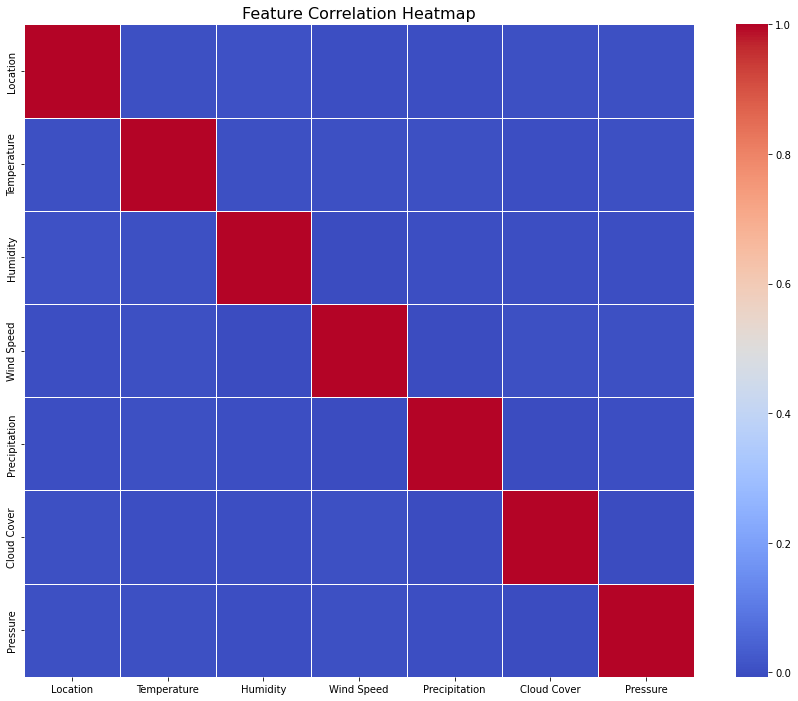

In [96]:
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [59]:
X=df.drop(['Date',"Rain Tomorrow"],axis=1)
X

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
0,11,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278
1,11,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065
2,11,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739
3,11,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163
4,11,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859
...,...,...,...,...,...,...,...
73095,19,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747
73096,19,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675
73097,19,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174
73098,19,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146


In [60]:
y=df[['Rain Tomorrow']]
y

,Rain Tomorrow
0,0
1,0
2,1
3,0
4,0
...,...
73095,0
73096,0
73097,1
73098,1


In [78]:
sc=StandardScaler()
scaled_x=sc.fit_transform(X)
X=pd.DataFrame(scaled_x,columns=X.columns)
X

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
0,0.260133,1.105756,0.684143,1.541362,-0.822685,0.564813,1.032198
1,0.260133,0.894653,-1.351014,-0.297798,0.287176,-0.513302,-0.456051
2,0.260133,0.780018,0.210917,-0.096107,1.108290,0.862970,-1.206671
3,0.260133,0.639191,-0.005899,0.510584,-0.624437,-0.092433,-1.295000
4,0.260133,-1.391804,-1.088542,-1.306808,2.044179,1.179310,1.317322
...,...,...,...,...,...,...,...
73095,1.647509,-1.215891,0.226498,1.587369,-0.822685,-0.029801,-1.390448
73096,1.647509,-0.620649,-1.268732,-0.315511,1.011657,-1.265274,-1.216821
73097,1.647509,-0.430062,1.598251,-1.398506,1.687596,-0.100328,0.558964
73098,1.647509,0.028046,0.174498,1.109104,0.195407,0.840667,1.347281


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
model_ann=MLPClassifier(hidden_layer_sizes=(50,3),
                        learning_rate_init=0.1,
                        max_iter=100)


In [81]:
model_ann.fit(X_train,y_train)

C:\paytan\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100)

In [82]:
pre=model_ann.predict(X_test)

In [83]:
pre


array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [84]:
y_test

,Rain Tomorrow
66127,0
43485,0
34304,1
34317,0
38631,0
...,...
8251,1
50745,1
50634,1
23941,1


In [85]:
accuracy_score(y_test,pre)

0.9963064295485636

In [95]:
print(confusion_matrix(y_test,pre))

[[11322    47]
 [    7  3244]]


In [86]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [87]:
lg.fit(X_train,y_train)

C:\paytan\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [88]:
predict=lg.predict(X_test)
predict

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [89]:
y_test

,Rain Tomorrow
66127,0
43485,0
34304,1
34317,0
38631,0
...,...
8251,1
50745,1
50634,1
23941,1


In [90]:
accuracy_score(y_test,predict)

0.9090971272229822

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11369
           1       0.85      0.71      0.77      3251

    accuracy                           0.91     14620
   macro avg       0.88      0.84      0.86     14620
weighted avg       0.90      0.91      0.90     14620



In [94]:
print(confusion_matrix(y_test,predict))

[[10991   378]
 [  951  2300]]
